In [168]:
%autosave 180

Autosaving every 180 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')

sns.set(font='IBM Plex Sans', font_scale=1.25)
sns.set_palette("tab20", 7)

df = pd.read_csv('results_new_combined.csv')
# df.info(verbose=True)

## make pct out of series
def create_pct(pd_series):
    return np.round((pd_series/pd_series.sum())*100, 2)

## make likert scales
likert = pd.Series(pd.Categorical(["Not at all", "A little", "Moderately", "Somewhat", "Very much"], ordered=True))
likert_interest = pd.Series(pd.Categorical(["Very Disinterested", "Disinterested", "Neutral", "Interested", "Very Interested"], ordered=True))
likert_relevant = pd.Series(pd.Categorical(["Not at all relevant", "Slightly relevant", "Moderately relevant", "Very relvant", "Extremely relevant"], ordered=True))
likert_degree = pd.Series(pd.Categorical(["Not at all", "A little", "Moderately", "Somewhat", "Very much"], ordered=True))
likert_agree = pd.Series(pd.Categorical(["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], ordered=True))


## first row of sample data
# df.iloc[0]

## get dtypes
# df.dtypes
df.columns

Index(['mturk', 'time_spent', 'notes', 'group_id', 'group_round1',
       'group_round2', 'group_round3', 'case1', 'case2', 'case3',
       'chat_username', 'age', 'gender', 'education', 'political',
       'political_engagement', 'confidence', 'moral0', 'moral1', 'moral2',
       'moral3', 'moral4', 'moral5', 'control_difficulty', 'control_time',
       'control_satisfaction', 'control0', 'control1', 'control2', 'control3',
       'control4', 'control5', 'scaleable_vote', 'scaleable_content_unlist',
       'scaleable_content_delete', 'scaleable_content_report',
       'scaleable_user_warn', 'scaleable_user_ban', 'scaleable_user_permaban',
       'scaleable_justification', 'scaleable_difficulty', 'scaleable_time',
       'scaleable_satisfaction', 'scaleable0', 'scaleable1', 'scaleable2',
       'scaleable3', 'scaleable4', 'scaleable5', 'immersive_vote',
       'immersive_content_unlist', 'immersive_content_delete',
       'immersive_content_report', 'immersive_user_warn', 'immersive_us

In [170]:
# num of rows (participants)
df.shape[0]

90

In [3]:
## CREATE COLUMN LINKING CASE TO CONDITION

rounds = ['group_round1','group_round2','group_round3']
conditions = ['No Jury', 'Blind Voting', 'Deliberating']

df['case_control'] = np.nan
df['case_scaleable'] = np.nan
df['case_immersive'] = np.nan


def match_case(row, condition_name):
    if row['group_round1'] == condition_name:
        return row['case1']
    elif row['group_round2'] == condition_name:
        return row['case2']
    else:
        return row['case3']
    
df['case_control'] = df.apply((lambda x: match_case(x, 'No Jury')), axis=1)
df['case_scaleable'] = df.apply((lambda x: match_case(x, 'Blind Voting')), axis=1)
df['case_immersive'] = df.apply((lambda x: match_case(x, 'Deliberating')), axis=1)


round_results = df[['mturk','group_id','group_round1','group_round2','group_round3',
                    'case1','case2','case3',
                    'case_control','case_scaleable','case_immersive',
                    'scaleable_vote','immersive_vote']]


In [4]:
## TOX SCORE: Scaleable vs. Immersive T-test

print("scaleable tox:", df['scaleable_vote'].mean())
print("immersive tox:", df['immersive_vote'].mean())

# df[df['scaleable_vote'] < 1]

scaleable tox: 7.416666666666667
immersive tox: 6.589887640449438


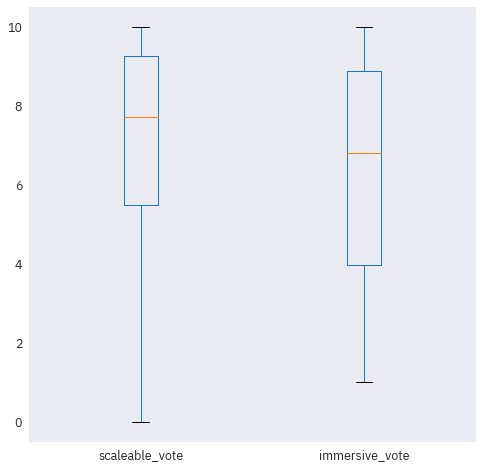

In [173]:
toxicity = df[['scaleable_vote','immersive_vote']].dropna().describe()


ax = toxicity.boxplot(grid=False, figsize=(8,8), showmeans=True)
ax.set_ylim(-0.5,10.5)



plt.savefig('toxicity.jpg', dpi=300, bbox_inches='tight')


In [179]:
### CONTENT AND USER ACTIONS

col_actions = ['group_id', 'case_scaleable', 'case_immersive',
               'scaleable_content_unlist','scaleable_content_delete', 'scaleable_content_report',
               'immersive_content_unlist', 'immersive_content_delete','immersive_content_report',
               'scaleable_user_warn', 'scaleable_user_ban', 'scaleable_user_permaban', 
               'immersive_user_warn', 'immersive_user_ban','immersive_user_permaban']

# df[col_content].query("case_scaleable == 'pepe' or case_immersive == 'pepe'")


sc_content = ['scaleable_content_unlist','scaleable_content_delete', 'scaleable_content_report']
im_content = ['immersive_content_unlist','immersive_content_delete', 'immersive_content_report']
sc_user = ['scaleable_user_warn', 'scaleable_user_ban', 'scaleable_user_permaban']
im_user = ['immersive_user_warn', 'immersive_user_ban','immersive_user_permaban']

content = df[sc_content + im_content].apply(pd.Series.value_counts)
content = content.apply(create_pct)
content = content.transpose()
content["condition"] = ["scaleable", "scaleable", "scaleable", "immersive", "immersive", "immersive"]
content["cat"] = ["content" for i in range(len(content))]
content["action"] = ["Unlist", "Delete", "Report", "Unlist", "Delete", "Report"]
content.sort_values(by=True)

,False,True,condition,cat,action
immersive_content_report,87.78,12.22,immersive,content,Report
scaleable_content_report,81.11,18.89,scaleable,content,Report
scaleable_content_unlist,76.67,23.33,scaleable,content,Unlist
immersive_content_unlist,68.89,31.11,immersive,content,Unlist
immersive_content_delete,50.00,50.00,immersive,content,Delete
scaleable_content_delete,43.33,56.67,scaleable,content,Delete


In [180]:
user = df[sc_user + im_user].apply(pd.Series.value_counts)
user = user.apply(create_pct)
user = user.transpose()
user["condition"] = ["scaleable", "scaleable", "scaleable", "immersive", "immersive", "immersive"]
user["cat"] = ["user" for i in range(len(content))]
user["action"] = ["Warn", "Ban", "Permaban", "Warn", "Ban", "Permaban"]
user.sort_values(by=True)



,False,True,condition,cat,action
immersive_user_permaban,86.67,13.33,immersive,user,Permaban
immersive_user_ban,84.44,15.56,immersive,user,Ban
scaleable_user_ban,75.56,24.44,scaleable,user,Ban
scaleable_user_permaban,74.44,25.56,scaleable,user,Permaban
scaleable_user_warn,66.67,33.33,scaleable,user,Warn
immersive_user_warn,50.00,50.00,immersive,user,Warn


In [181]:
actions = pd.concat([content, user])
actions

### PIVOT TABLE OF ACTIONS
# df.pivot_table(index=['case_scaleable', 'case_immersive'], values=['scaleable_vote'], aggfunc=[np.mean, len], dropna=True)


c_sc = actions.query("cat == 'content' and condition == 'scaleable'")
c_im = actions.query("cat == 'content' and condition == 'immersive'")
u_sc = actions.query("cat == 'user' and condition == 'scaleable'")
u_im = actions.query("cat == 'user' and condition == 'immersive'")



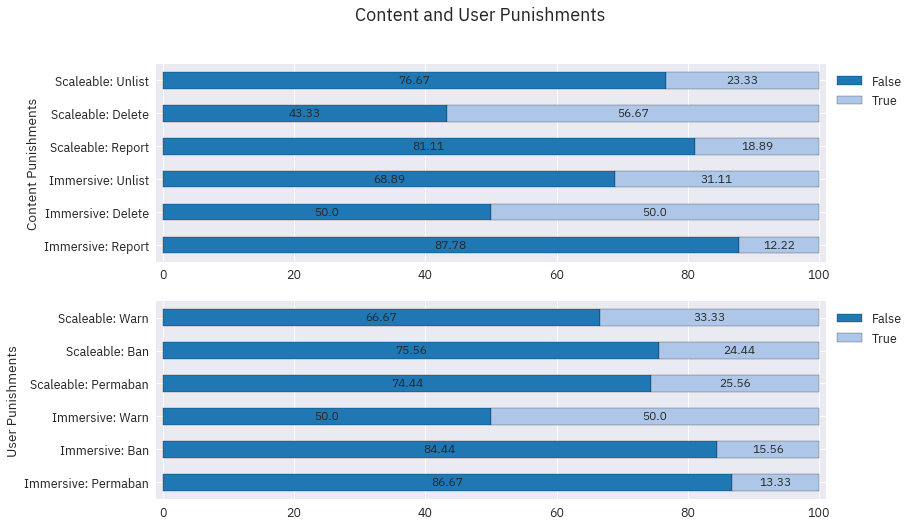

In [182]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs.ravel()

content.plot(kind='barh', ax=axs[0], edgecolor='k', linewidth=0.25, stacked=True)
user.plot(kind='barh', ax=axs[1], edgecolor='k', legend=False, linewidth=0.25, stacked=True)

actions = [content, user]

for i in range (0,2):
    ## offset legend outside of box
    axs[i].legend(bbox_to_anchor=(1, 1))

    ## flip axes so True is first
    axs[i].invert_yaxis()
    
    axs[i].set_xlim(-1, 101)
    
    rects = axs[i].patches

    # labels = ["label%d" % i for i in range(len(rects))]
    labels_t = list(actions[i][False])
    labels_f = list(actions[i][True])
    labels = labels_t + labels_f
    labels

    for rect, label in zip(rects, labels):
        axs[i].text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2, label,
                ha='center', va='center', fontsize=12)

        
    
axs[0].set_ylabel("Content Punishments")
axs[0].set_yticklabels(["Scaleable: Unlist", "Scaleable: Delete", "Scaleable: Report", "Immersive: Unlist", "Immersive: Delete", "Immersive: Report"])
axs[1].set_yticklabels(["Scaleable: Warn", "Scaleable: Ban", "Scaleable: Permaban", "Immersive: Warn", "Immersive: Ban", "Immersive: Permaban"])
axs[1].set_ylabel("User Punishments")
fig.suptitle("Content and User Punishments")

fig.savefig('punishments_content_user.jpg', dpi=300, bbox_inches='tight')



In [8]:
### MEAN TOXICITY PER CASE

pepe = df.query("case_immersive == 'pepe' or case_scaleable  == 'pepe'")
momo = df.query("case_immersive == 'momo' or case_scaleable  == 'momo'")
christchurch = df.query("case_immersive == 'christchurch' or case_scaleable  == 'christchurch'")

print("scaleable SD: ", df['scaleable_vote'].std())
print("immersive SD: ", df['immersive_vote'].std())

# print("momo scaleable: ", momo['scaleable_vote'].mean())
# print("momo immersive: ", momo['immersive_vote'].mean())
# print("christchurch scaleable: ", christchurch['scaleable_vote'].mean())
# print("christchurch immersive: ", christchurch['immersive_vote'].mean())
# print("pepe scaleable: ", pepe['scaleable_vote'].mean())
# print("pepe immersive: ", pepe['immersive_vote'].mean())


scaleable SD:  2.440586133320703
immersive SD:  2.3962112587004474


In [322]:

votes_sc = df.pivot_table(index=['case_scaleable'], values=['scaleable_vote'], aggfunc=[np.mean, np.std, len], dropna=True)
votes_im = df.pivot_table(index=['case_immersive'], values=['immersive_vote'], aggfunc=[np.mean, np.std, len], dropna=True)

votes_sc

,mean,std,len
,scaleable_vote,scaleable_vote,scaleable_vote
case_scaleable,,,
christchurch,8.112903,2.538732,31.0
momo,6.850000,2.224860,20.0
pepe,7.153846,2.398338,39.0


In [320]:
votes_im

,mean,std,len
,immersive_vote,immersive_vote,immersive_vote
case_immersive,,,
christchurch,7.486842,1.832466,38.0
momo,5.705882,2.361682,35.0
pepe,6.352941,2.946209,17.0


In [328]:
### MEAN DIFFICULTY PER CASE

print("mean difficulty")

pepe = df.query("case_immersive == 'pepe' or case_scaleable  == 'pepe'")
momo = df.query("case_immersive == 'momo' or case_scaleable  == 'momo'")
christchurch = df.query("case_immersive == 'christchurch' or case_scaleable  == 'christchurch'")

print("momo control: ", momo['control_difficulty'].mean())
print("momo scaleable: ", momo['scaleable_difficulty'].mean())
print("momo immersive: ", momo['immersive_difficulty'].mean())

print("christchurch control: ", christchurch['control_difficulty'].mean())
print("christchurch scaleable: ", christchurch['scaleable_difficulty'].mean())
print("christchurch immersive: ", christchurch['immersive_difficulty'].mean())


print("pepe control: ", pepe['control_difficulty'].mean())
print("pepe scaleable: ", pepe['scaleable_difficulty'].mean())
print("pepe immersive: ", pepe['immersive_difficulty'].mean())



mean difficulty
momo control:  1.490909090909091
momo scaleable:  1.7454545454545454
momo immersive:  2.0545454545454547
christchurch control:  1.318840579710145
christchurch scaleable:  1.4202898550724639
christchurch immersive:  1.7681159420289856
pepe control:  1.3035714285714286
pepe scaleable:  1.5
pepe immersive:  1.8392857142857142


In [327]:
## Votes (per juror) for CASE x CONDITION

'''
PEPE AUTOMATED DECISION
Toxicity score: 9.5
Content Action: DELETE
User Action: WARN

CHRISTCHURCH AUTOMATED DECISION
Toxicity score: 7
Content Action: UNLIST FROM SEARCH
User Action: WARN

MOMO AUTOMATED DECISION
Toxicity score: 4
Content Action: NONE
User Action: WARN

'''

control_pepe_mean = 9.5
control_cc_mean = 7
control_momo_mean = 4


### BY JURY
votes_jury = {}

votes_jury['pepe'] = {}
votes_jury['christchurch'] = {}
votes_jury['momo'] = {}

votes_jury['pepe']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'pepe'].groupby(['group_id']).describe()
votes_jury['pepe']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'pepe'].groupby(['group_id']).describe()
votes_jury['christchurch']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'christchurch'].groupby(['group_id']).describe()
votes_jury['christchurch']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'christchurch'].groupby(['group_id']).describe()
votes_jury['momo']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'momo'].groupby(['group_id']).describe()
votes_jury['momo']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'momo'].groupby(['group_id']).describe()


### BY JUROR
votes_juror = {}

votes_juror['pepe'] = {}
votes_juror['christchurch'] = {}
votes_juror['momo'] = {}

votes_juror['pepe']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'pepe'].dropna()
votes_juror['pepe']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'pepe'].dropna()
votes_juror['christchurch']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'christchurch'].dropna()
votes_juror['christchurch']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'christchurch'].dropna()
votes_juror['momo']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'momo'].dropna()
votes_juror['momo']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'momo'].dropna()


### checking output
# votes_jury['pepe']['scaleable']

juror level: pepe SC / cc SC / momo SC / pepe IM / cc IM / momo IM
2.3983378184688613
2.538732221074641
2.2248595461286986
2.9462089299341163
1.8324656337077028
2.3616816269243133


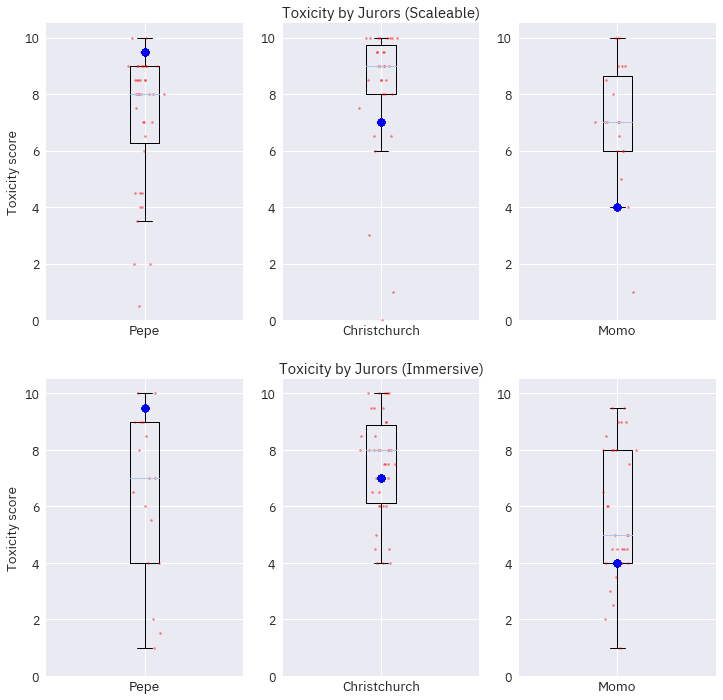

In [186]:
### JUROR LEVEL

fig, axs = plt.subplots(2,3, figsize=(12,12))
axs = axs.ravel()

mean_scores = [
    votes_juror['pepe']['scaleable']['scaleable_vote'],
    votes_juror['christchurch']['scaleable']['scaleable_vote'],
    votes_juror['momo']['scaleable']['scaleable_vote'],
    votes_juror['pepe']['immersive']['immersive_vote'],
    votes_juror['christchurch']['immersive']['immersive_vote'],
    votes_juror['momo']['immersive']['immersive_vote']
]

print("juror level: pepe SC / cc SC / momo SC / pepe IM / cc IM / momo IM")
for i in mean_scores:
    print (i.std())
    

for i in range(0, len(mean_scores)):
    axs[i].boxplot(mean_scores[i])
    y = mean_scores[i]
    x = np.random.normal(1, 0.04, size=len(y))
    axs[i].plot(x, y, 'r.', markersize=5, alpha=0.5)

    
## plotting the control points
for j in [0,3]:
    y = [control_pepe_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=1)
    
for j in [1,4]:
    y = [control_cc_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0., size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=1)
    
for j in [2,5]:
    y = [control_momo_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=1)

    
for ax in axs:
    ax.set_ylim(0, 10.5)
    ax.tick_params(axis='x',bottom=False,labelbottom=False)
    
    
axs[0].set_ylabel('Toxicity score')
axs[3].set_ylabel('Toxicity score')

axs[0].set_xlabel('Pepe')
axs[1].set_xlabel('Christchurch')
axs[2].set_xlabel('Momo')
axs[3].set_xlabel('Pepe')
axs[4].set_xlabel('Christchurch')
axs[5].set_xlabel('Momo')

axs[1].set_title("Toxicity by Jurors (Scaleable)")
axs[4].set_title("Toxicity by Jurors (Immersive)")


fig.savefig('toxicity_case_jurors.jpg', dpi=300, bbox_inches='tight')

jury level: pepe SC / cc SC / momo SC / pepe IM / cc IM / momo IM
1.2338524933348565
1.8003426885724554
0.6238767684585013
0.6508541396588876
1.35890694546012
2.039004277205008


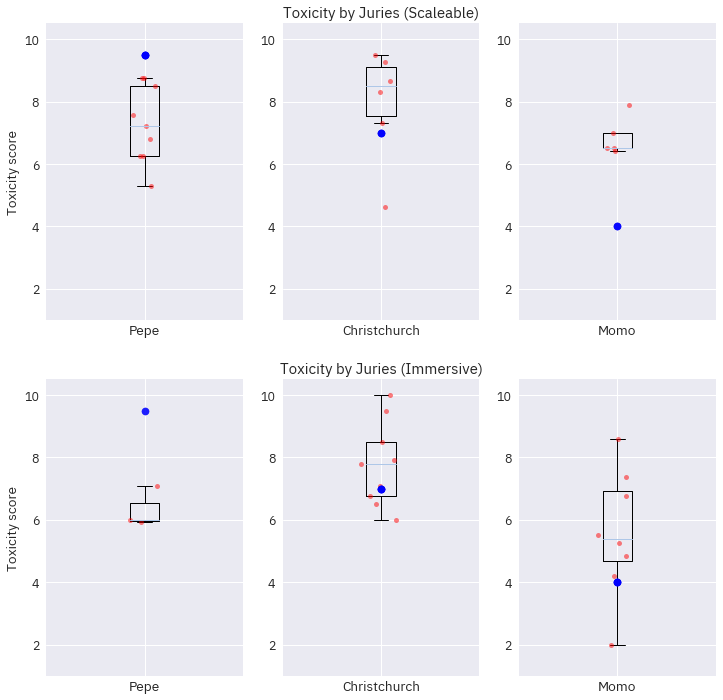

In [187]:
### JURY LEVEL

fig, axs = plt.subplots(2,3, figsize=(12,12))
axs = axs.ravel()

mean_scores = [
    votes_jury['pepe']['scaleable']['scaleable_vote']['mean'],
    votes_jury['christchurch']['scaleable']['scaleable_vote']['mean'],
    votes_jury['momo']['scaleable']['scaleable_vote']['mean'],
    votes_jury['pepe']['immersive']['immersive_vote']['mean'],
    votes_jury['christchurch']['immersive']['immersive_vote']['mean'],
    votes_jury['momo']['immersive']['immersive_vote']['mean']
]


print("jury level: pepe SC / cc SC / momo SC / pepe IM / cc IM / momo IM")
for i in mean_scores:
    print (i.std())
    

for i in range(0, len(mean_scores)):
    axs[i].boxplot(mean_scores[i])
    y = mean_scores[i]
    x = np.random.normal(1, 0.04, size=len(y))
    axs[i].plot(x, y, 'r.', markersize=10, alpha=0.5)

    
## plotting the control points
for j in [0,3]:
    y = [control_pepe_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=0.5)
    
for j in [1,4]:
    y = [control_cc_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0., size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=0.5)
    
for j in [2,5]:
    y = [control_momo_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=0.5)

    
for ax in axs:
    ax.set_ylim(1, 10.5)
    ax.tick_params(axis='x',bottom=False,labelbottom=False)
    
    
axs[0].set_ylabel('Toxicity score')
axs[3].set_ylabel('Toxicity score')

axs[0].set_xlabel('Pepe')
axs[1].set_xlabel('Christchurch')
axs[2].set_xlabel('Momo')
axs[3].set_xlabel('Pepe')
axs[4].set_xlabel('Christchurch')
axs[5].set_xlabel('Momo')

axs[1].set_title("Toxicity by Juries (Scaleable)")
axs[4].set_title("Toxicity by Juries (Immersive)")

fig.savefig('toxicity_case_juries.jpg', dpi=300, bbox_inches='tight')

# Jury-level analysis

- Number of jurors per jury
- Time spent per juror/jury
- Toxicity per jury

In [189]:
juries = df.groupby(by='group_id')

In [243]:
## num of jurors in each jury
jury_size = pd.DataFrame(juries.size(), columns=['group_size'])

## Merge jury size info from the jury_size DF to main DF
if 'group_size' not in df.columns:
    df = df.merge(jury_size, on='group_id')
    
jury_size

,group_size
group_id,
3,2
4,2
7,6
8,2
9,5
10,4
12,6
13,6
14,6


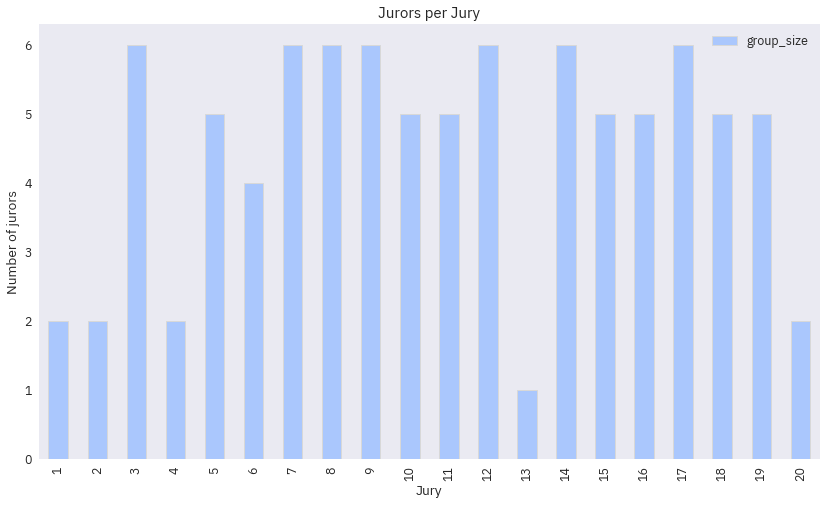

In [244]:
## Bar chart of jurors per jury

jury_size.index = np.arange(1,21)
# jury_size = jury_size.sort_values(by='group_size') 

jury_size.plot(kind='bar', grid=False, edgecolor='#D8D8D8', linewidth=1, figsize=(14,8))

plt.title("Jurors per Jury")
plt.xlabel('Jury')
plt.ylabel('Number of jurors')


plt.savefig('jurors_per_jury.jpg', dpi=300, bbox_inches='tight')


In [311]:
## JURY CHATTINESS

# df[['group_id','group_size','num_chat_messages', 'num_chat_words']]

jury_chats = df.pivot_table(index=['group_id'], values=['num_chat_messages', 'num_chat_words'], aggfunc=np.sum, dropna=True)
jury_chats.index = np.arange(1,21)

chat_msg_mean = jury_chats['num_chat_messages'].mean()
chat_word_mean = jury_chats['num_chat_words'].mean()


print("juror msgs: ", df['num_chat_messages'].mean())
print("juror words: ", df['num_chat_words'].mean())
print(chat_word_mean / chat_msg_mean)


print("\njury msgs: ", chat_msg_mean)
print("jury words: ", chat_word_mean)
print(chat_word_mean / chat_msg_mean)


juror msgs:  3.977777777777778
juror words:  37.855555555555554
9.516759776536313

jury msgs:  17.9
jury words:  170.35
9.516759776536313


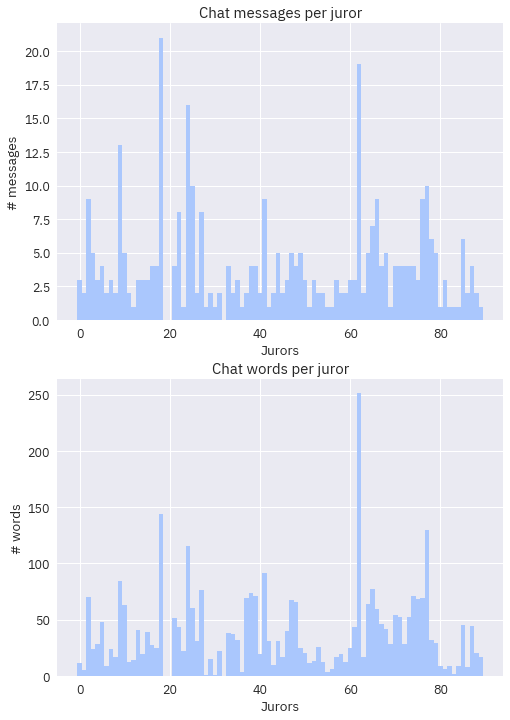

In [313]:
fig, ax = plt.subplots(2,1, figsize=(8,12))
ax.ravel()

x = np.arange(len(df['mturk']))
width = 1

ax[0].bar(x, df['num_chat_messages'], width)
ax[1].bar(x, df['num_chat_words'], width)

ax[0].set_title("Chat messages per juror")
ax[0].set_ylabel("# messages")
ax[0].set_xlabel("Jurors")

ax[1].set_title("Chat words per juror")
ax[1].set_ylabel("# words")
ax[1].set_xlabel("Jurors")


fig.savefig('juror_chats.jpg', dpi=300, bbox_inches='tight')


In [254]:
chats = pd.concat([jury_chats, jury_size], axis=1)
chats = chats.groupby('group_size').describe()

chats['group_size'] = chats.index
chats.fillna(0)

num_chat_messages                                                 \
                       count       mean        std   min   25%   50%    75%   
group_size                                                                    
1                        1.0   1.000000   0.000000   1.0   1.0   1.0   1.00   
2                        4.0   7.250000   4.787136   3.0   4.5   6.0   8.75   
4                        1.0  25.000000   0.000000  25.0  25.0  25.0  25.00   
5                        7.0  20.142857   9.839183  14.0  15.0  18.0  18.50   
6                        7.0  23.142857  10.960970  14.0  15.0  16.0  30.50   

                 num_chat_words                                                \
             max          count        mean         std    min     25%    50%   
group_size                                                                      
1            1.0            1.0    3.000000    0.000000    3.0    3.00    3.0   
2           14.0            4.0   55.500000   35.425979   16.0   31.75   56.0   
4           25.0            1.0  169.000000    0.000000  169.0  169.00  169.0   
5           42.0            7.0  209.428571  127.736522   85.0  124.00  221.0   
6           41.0            7.0  221.000000  118.453929  107.0  118.50  210.0   

                          group_size  
               75%    max             
group_size                            
1             3.00    3.0          1  
2            79.75   94.0          2  
4           169.00  169.0          4  
5           222.00  468.0          5  
6           287.50  418.0          6

/Users/jennyfan/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


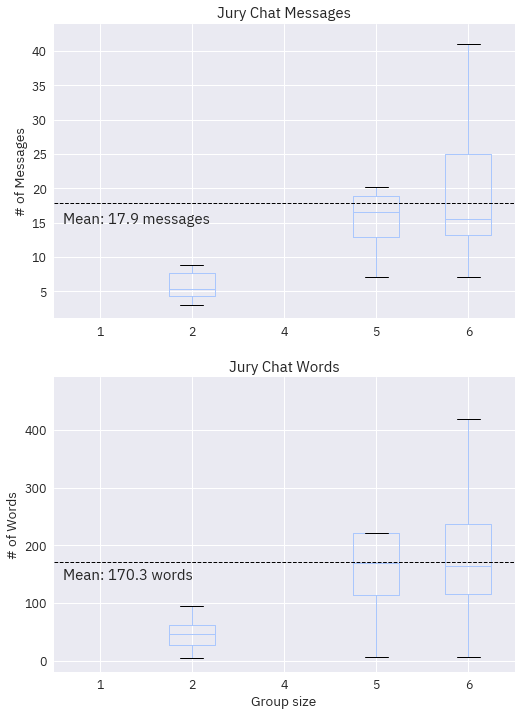

In [315]:
fig, axs = plt.subplots(2,1, figsize=(8,12))
axs.ravel()


chats.boxplot(ax=axs[0], column=['num_chat_messages'], by=chats.index)
chats.boxplot(ax=axs[1], column=['num_chat_words'], by=chats.index)

axs[0].set_title("Jury Chat Messages")
axs[1].set_title("Jury Chat Words")

axs[0].set_xlabel("")
axs[0].set_ylabel("# of Messages")

axs[1].set_xlabel("Group size")
axs[1].set_ylabel("# of Words")

fig.suptitle("")

axs[0].axhline(chat_msg_mean, color='black', linestyle='dashed', linewidth=1)
axs[1].axhline(chat_word_mean, color='black', linestyle='dashed', linewidth=1)

axs[0].text(0.6, chat_msg_mean - 3, 'Mean: {:.1f} messages'.format(chat_msg_mean))
axs[1].text(0.6, chat_word_mean - 30, 'Mean: {:.1f} words'.format(chat_word_mean))


fig.savefig('jury_chats.jpg', dpi=300, bbox_inches='tight')


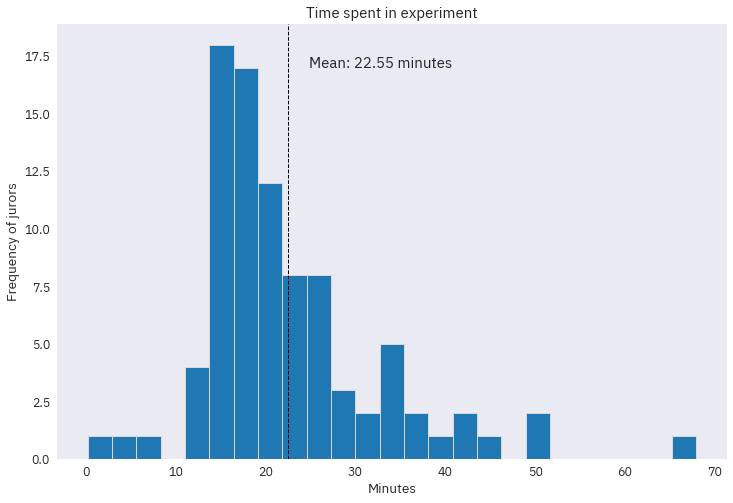

In [194]:
## Time spent per juror

df['time_spent_min'] = df['time_spent'] / pd.Timedelta(minutes=1)

q = df['time_spent_min'].quantile(0.99)

## filter out for one time outlier
adj_time = df[df['time_spent_min'] < q]

## histogram distro of time spent
adj_time['time_spent_min'].hist(bins=25, grid=False, edgecolor='#D8D8D8', linewidth=1, figsize=(12,8))

plt.title("Time spent in experiment")
plt.xlabel('Minutes')
plt.ylabel('Frequency of jurors')

## mean time spent (min)
# adj_time['time_spent_min'].mean()

plt.axvline(adj_time['time_spent_min'].mean(), color='black', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()
plt.text(adj_time['time_spent_min'].mean() + adj_time['time_spent_min'].mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f} minutes'.format(adj_time['time_spent_min'].mean()))


plt.savefig('timespent_juror.jpg', dpi=300, bbox_inches='tight')


Text(21.5,22.5464,'Mean: 22.55 minutes')

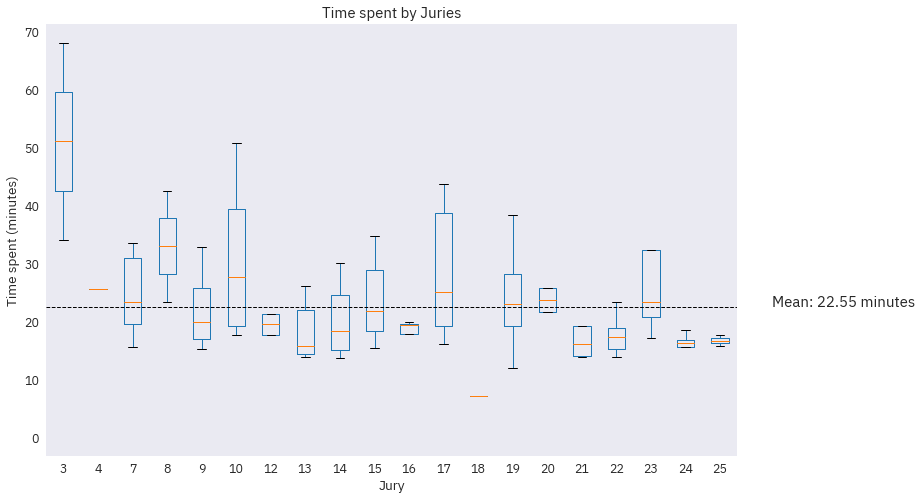

In [195]:
## boxplot of time spent, grouped by jury

ax = adj_time.boxplot(column='time_spent_min', by='group_id', grid=False, figsize=(12,8))

plt.title("Time spent by Juries")
plt.suptitle("")

plt.xlabel('Jury')
plt.ylabel('Time spent (minutes)')

plt.axhline(adj_time['time_spent_min'].mean(), color='black', linestyle='dashed', linewidth=1)

ax.set_xticks(np.arange(1,21))

max_, _ = plt.xlim()
plt.text(max_ + 21,
         adj_time['time_spent_min'].mean(),
         'Mean: {:.2f} minutes'.format(adj_time['time_spent_min'].mean()))

# plt.savefig('timespent_jury.jpg', dpi=300, bbox_inches='tight')

In [316]:
### TOXICITY PER JURY
# juries['scaleable_vote','immersive_vote'].describe()

toxicity_jury = pd.DataFrame(juries['scaleable_vote','immersive_vote'].describe())
toxicity_jury.index = np.arange(1,21)
toxicity_jury


scaleable_vote                                                      \
            count      mean       std  min    25%   50%     75%   max   
1             2.0  8.750000  1.060660  8.0  8.375  8.75   9.125   9.5   
2             2.0  6.500000  3.535534  4.0  5.250  6.50   7.750   9.0   
3             6.0  6.416667  0.801041  5.0  6.125  6.75   7.000   7.0   
4             2.0  8.500000  0.707107  8.0  8.250  8.50   8.750   9.0   
5             5.0  6.800000  2.774887  2.0  7.000  8.00   8.000   9.0   
6             4.0  4.625000  3.198307  1.0  2.500  4.75   6.875   8.0   
7             6.0  7.583333  1.908315  4.0  7.250  8.25   8.875   9.0   
8             6.0  6.500000  3.016621  1.0  6.000  7.00   8.750   9.0   
9             6.0  8.666667  1.888562  6.0  7.250  9.75  10.000  10.0   
10            5.0  5.300000  3.684427  0.5  3.500  4.50   9.000   9.0   
11            5.0  7.300000  4.117038  0.0  8.500  9.00   9.000  10.0   
12            6.0  9.250000  0.935414  7.5  9.125  9.50   9.875  10.0   
13            1.0  7.000000       NaN  7.0  7.000  7.00   7.000   7.0   
14            6.0  6.250000  2.162175  4.0  4.500  6.00   7.875   9.0   
15            5.0  8.300000  0.273861  8.0  8.000  8.50   8.500   8.5   
16            5.0  7.200000  2.906888  2.0  8.500  8.50   8.500   8.5   
17            6.0  8.750000  1.172604  7.0  8.125  8.75   9.750  10.0   
18            5.0  9.500000  0.500000  9.0  9.000  9.50  10.000  10.0   
19            5.0  7.900000  2.509980  4.0  7.000  8.50  10.000  10.0   
20            2.0  6.250000  0.353553  6.0  6.125  6.25   6.375   6.5   

   immersive_vote                                                          
            count       mean       std   min     25%    50%     75%   max  
1             2.0   6.750000  1.060660   6.0   6.375   6.75   7.125   7.5  
2             2.0   6.000000  2.121320   4.5   5.250   6.00   6.750   7.5  
3             6.0   6.750000  1.541104   4.0   6.250   7.25   7.875   8.0  
4             2.0  10.000000  0.000000  10.0  10.000  10.00  10.000  10.0  
5             5.0   8.500000  1.457738   6.5   7.500   9.00   9.500  10.0  
6             4.0   7.375000  2.322893   4.5   6.000   7.75   9.125   9.5  
7             6.0   4.833333  1.807392   2.5   4.125   4.75   5.000   8.0  
8             6.0   6.500000  1.732051   4.0   5.375   6.75   7.750   8.5  
9             6.0   7.083333  2.973494   2.0   5.875   8.00   9.000  10.0  
10            5.0   4.200000  0.447214   3.5   4.000   4.50   4.500   4.5  
11            5.0   6.000000  3.535534   1.0   4.000   7.00   8.000  10.0  
12            6.0   5.916667  2.818096   1.5   4.500   6.25   8.000   9.0  
13            1.0   9.500000       NaN   9.5   9.500   9.50   9.500   9.5  
14            6.0   5.500000  2.345208   2.0   4.250   5.50   7.500   8.0  
15            4.0   5.250000  2.500000   4.0   4.000   4.00   5.250   9.0  
16            5.0   7.800000  2.196588   4.0   8.000   8.50   9.000   9.5  
17            6.0   7.083333  1.960017   4.5   6.000   7.00   8.000  10.0  
18            5.0   8.600000  0.651920   8.0   8.000   8.50   9.000   9.5  
19            5.0   7.900000  1.431782   6.0   7.500   8.00   8.000  10.0  
20            2.0   2.000000  1.414214   1.0   1.500   2.00   2.500   3.0

/Users/jennyfan/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
No handles with labels found to put in legend.


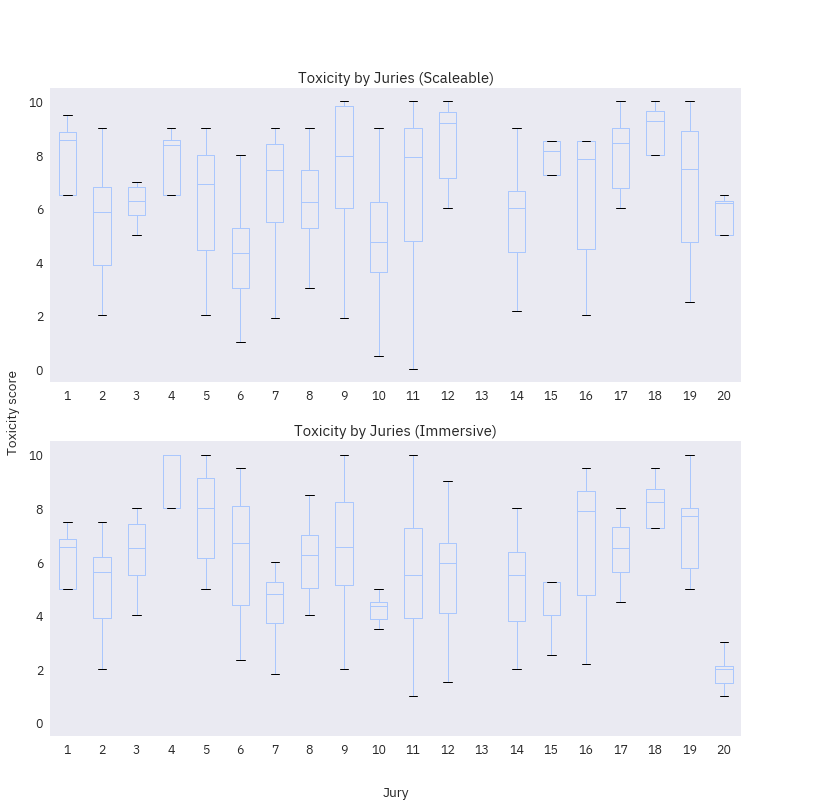

In [317]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Plot toxicity scores
toxicity_jury.boxplot(ax=ax1, column=['scaleable_vote'], by=toxicity_jury.index, grid=False)
toxicity_jury.boxplot(ax=ax2, column=['immersive_vote'], by=toxicity_jury.index, grid=False)


ax.set_xlabel('Jury', labelpad=50)
ax.set_ylabel('Toxicity score', labelpad=30)
ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_title("Toxicity by Juries (Scaleable)")
ax2.set_title("Toxicity by Juries (Immersive)")

ax.get_figure().suptitle("")
ax.set_facecolor('white')

fig.legend(loc='upper right', fontsize=10)

ax.tick_params(axis='x',bottom=False,labelbottom=False)
ax.tick_params(axis='y',left=False,labelleft=False)

ax1.set_xticks(np.arange(1,21))
ax2.set_xticks(np.arange(1,21))


plt.savefig('toxicity_jury.jpg', dpi=300, bbox_inches='tight')

# Condition-level Analysis

- matching round and case
- toxicity per condition x case
- time/difficulty/satisfaction per case
- time/difficulty/satisfaction per condition
- condition preferences

In [198]:
col_rounds = ['group_id', 'group_round1', 'group_round2', 'group_round3', 'case1', 'case2', 'case3', 'control0', 'control1', 'control2', 'control3',
       'control4', 'control5','scaleable0', 'scaleable1', 'scaleable2',
       'scaleable3', 'scaleable4', 'scaleable5','immersive0', 'immersive1',
       'immersive2', 'immersive3', 'immersive4', 'immersive5']

# rounds = df[col_rounds]
# rounds

In [199]:
col_time = ['control_time','scaleable_time','immersive_time']
col_difficulty = ['control_difficulty', 'scaleable_difficulty','immersive_difficulty']
col_satisfaction = ['control_satisfaction','scaleable_satisfaction',
                    'immersive_satisfaction','scaleable_vote','immersive_vote']


# unsatisfied = df.query("immersive_satisfaction == '1'").dropna()
# satisfied = df.query("immersive_satisfaction == '5'").dropna()
df[col_time].describe()
df[col_difficulty].describe()
df[col_satisfaction].describe()


,control_satisfaction,scaleable_satisfaction,immersive_satisfaction,scaleable_vote,immersive_vote
count,90.000000,90.000000,90.000000,90.000000,89.000000
mean,3.444444,3.322222,3.822222,7.416667,6.589888
std,1.522204,1.475095,1.320349,2.440586,2.396211
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,3.000000,6.500000,4.500000
50%,4.000000,4.000000,4.000000,8.000000,7.000000
75%,5.000000,5.000000,5.000000,9.000000,8.500000
max,5.000000,5.000000,5.000000,10.000000,10.000000


/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jennyfan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


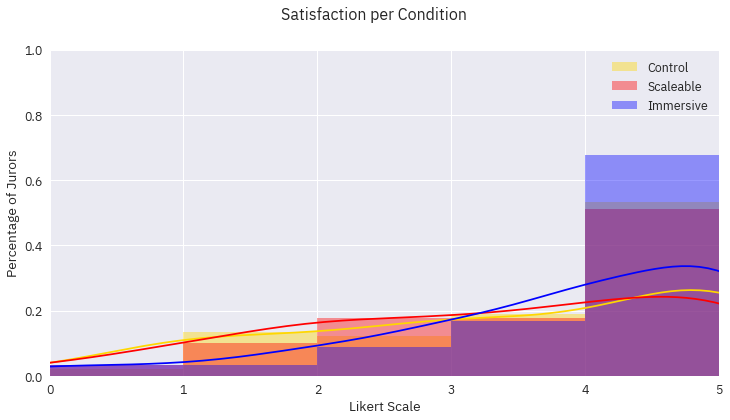

In [200]:
## Round preference (satisfaction)


fig, ax = plt.subplots(1,1, figsize=(12,6), sharex=True)

sns.distplot( df['control_satisfaction'] , hist=True, color="gold", bins=5, label="Control", ax=ax)
sns.distplot( df['scaleable_satisfaction'] , hist=True, color="red", bins=5, label="Scaleable", ax=ax)
sns.distplot( df['immersive_satisfaction'] , hist=True, color="blue", bins=5, label="Immersive", ax=ax)


# # satisfaction
# sns.distplot( df['control_satisfaction'] , hist=True, color="skyblue", hist_kws={'alpha':0.5}, label="Control", ax=axs[0])
# sns.distplot( df['scaleable_satisfaction'] , hist=True, color="red", hist_kws={'alpha':0.5}, label="Scaleable", ax=axs[0])
# sns.distplot( df['immersive_satisfaction'] , hist=True, color="gold", hist_kws={'alpha':0.5}, label="Immersive", ax=axs[0])

# # time
# sns.distplot( df['control_time'] , hist=True, kde=False, color="skyblue", hist_kws={'alpha':0.5}, label="Control", ax=axs[1])
# sns.distplot( df['scaleable_time'] , hist=True, kde=False, color="red", hist_kws={'alpha':0.5}, label="Scaleable", ax=axs[1])
# sns.distplot( df['immersive_time'] , hist=True, kde=False, color="gold",hist_kws={'alpha':0.5}, label="Immersive", ax=axs[1])

# # difficulty
# sns.distplot( df['control_difficulty'] , hist=True, kde=False, color="skyblue", hist_kws={'alpha':0.5}, label="Control", ax=axs[2])
# sns.distplot( df['scaleable_difficulty'] , hist=True, kde=False, color="red", hist_kws={'alpha':0.5}, label="Scaleable", ax=axs[2])
# sns.distplot( df['immersive_difficulty'] , hist=True, kde=False, color="gold", hist_kws={'alpha':0.5}, label="Immersive", ax=axs[2])

plt.legend()
plt.xlim(0, 5)
plt.ylim(0, 1)

fig.suptitle("Satisfaction per Condition", fontsize=16)

# axs[0].set_xlabel("Satisfaction")
# axs[1].set_xlabel("Time")
# axs[2].set_xlabel("Difficulty")

ax.set_xlabel("Likert Scale")
ax.set_ylabel("Percentage of Jurors")


fig.savefig('condition_satisfaction.jpg', dpi=300, bbox_inches='tight')

In [201]:
## Word Frequency for Round Preference reason

freq = pd.DataFrame(df['complete_prefwhy'].dropna().apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0), columns=["count"]).sort_values(["count"], ascending=False)

freq[:5]

,count
to,100.0
the,86.0
I,64.0
and,62.0
a,44.0


# Demographic analysis

- age
- gender
- education
- political/engagement
- confidence


In [202]:
col_demographics = ['age', 'gender', 'education', 'political','political_engagement',
                    'confidence', 'complete_confidence','complete_familiarity']

demographics = df[col_demographics]

demographics[:5]

,age,gender,education,political,political_engagement,confidence,complete_confidence,complete_familiarity
0,25-34,Male,College,Democrat,Interested,Moderately,4,3
1,25-34,Female,High school,Republican,Interested,Very Much,5,5
2,18-24,Female,Grad/professional,Democrat,Very Interested,Very Much,5,3
3,25-34,Male,College,Republican,Interested,Somewhat,4,2
4,35-44,Male,High school,Democrat,Interested,Somewhat,5,5


In [203]:
gender = df[['gender']].apply(pd.Series.value_counts)
gender['gender_pct'] = gender.apply(create_pct)

gender

,gender,gender_pct
Male,59,69.41
Female,26,30.59


In [204]:
age = df[['age']].apply(pd.Series.value_counts)
age['age_pct'] = age.apply(create_pct)

age

,age,age_pct
25-34,39,45.35
35-44,20,23.26
45-54,13,15.12
18-24,11,12.79
55-64,3,3.49


In [205]:
edu = df[['education']].apply(pd.Series.value_counts)
edu['edu_pct'] = edu.apply(create_pct)

edu

,education,edu_pct
College,45,52.33
High school,32,37.21
Grad/professional,7,8.14
Some high school,2,2.33


In [ ]:
52.33+8.14

In [206]:
poli = df[['political']].apply(pd.Series.value_counts)
poli['poli_pct'] = poli.apply(create_pct)

poli


,political,poli_pct
Democrat,43,51.19
Republican,20,23.81
Independent,18,21.43
Libertarian,2,2.38
Other,1,1.19


In [207]:
eng = df[['political_engagement']].apply(pd.Series.value_counts)

eng['eng_pct'] = eng.apply(create_pct)

## Reindex to reorder lissts
eng.reindex(likert_interest)

eng['political_engagement'].mean()/5


3.3600000000000003

In [209]:
## Participation

col_participation = ['complete_participate0','complete_participate1','complete_participate2','complete_participate3','complete_participate4']

participation = df[col_participation].apply(pd.Series.value_counts)
participation.columns=['Volunteer', 'Free Time', 'Paid', 'Mandatory','No']

participation = participation.apply(create_pct)
participation = participation.transpose()
participation

,False,True
Volunteer,76.67,23.33
Free Time,63.33,36.67
Paid,17.78,82.22
Mandatory,90.00,10.00
No,96.67,3.33


In [210]:
labels_t = list(participation[False])
labels_f = list(participation[True])
labels = labels_t + labels_f
labels

[76.67, 63.33, 17.78, 90.0, 96.67, 23.33, 36.67, 82.22, 10.0, 3.33]

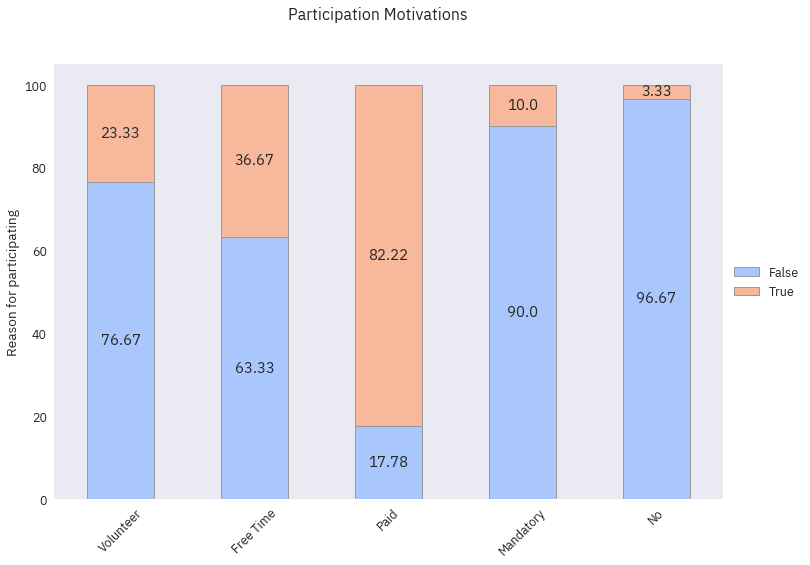

In [211]:
## Round preference (satisfaction)

sns.set_palette("coolwarm", 2)

fig, ax = plt.subplots(1,1, figsize=(12,8))

participation.plot(kind='bar', ax=ax, stacked=True, edgecolor='#999999', grid=False, linewidth=1)

plt.suptitle("Participation Motivations", fontsize=16)
fig.legend(loc='right')

plt.legend().remove()
plt.xticks(rotation=45)

ax.set_ylabel("Reason for participating")

rects = ax.patches

# labels = ["label%d" % i for i in range(len(rects))]

for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2, label,
            ha='center', va='center')
    

fig.savefig('participation.jpg', dpi=300, bbox_inches='tight')



In [212]:
## Confidence before and after
col_confidence = ['confidence', 'complete_confidence','complete_familiarity']

confidence = df[col_confidence]

In [213]:
## Moral Values

col_morals = ['moral0', 'moral1', 'moral2','moral3', 'moral4', 'moral5']
morals = df[col_morals].apply(pd.Series.value_counts)

morals.columns=['Care', 'Fairness', 'Sanctity', 'Loyalty', 'Authority', 'Liberty']

## percentage distro of moral values
# morals

morals = morals.apply(create_pct)
morals = morals.transpose()

In [214]:
labels = []

for i in morals:
    labels = labels + list(morals[i])
    
labels = ["%.1f%%" % i for i in labels]
labels

['1.1%',
 '1.1%',
 '1.1%',
 '1.1%',
 '1.1%',
 '1.1%',
 '3.3%',
 '4.4%',
 '17.8%',
 '32.2%',
 '27.8%',
 '3.3%',
 '10.0%',
 '7.8%',
 '24.4%',
 '36.7%',
 '26.7%',
 '2.2%',
 '11.1%',
 '25.6%',
 '21.1%',
 '21.1%',
 '28.9%',
 '6.7%',
 '28.9%',
 '31.1%',
 '20.0%',
 '4.4%',
 '10.0%',
 '23.3%',
 '45.6%',
 '30.0%',
 '15.6%',
 '4.4%',
 '5.6%',
 '63.3%']

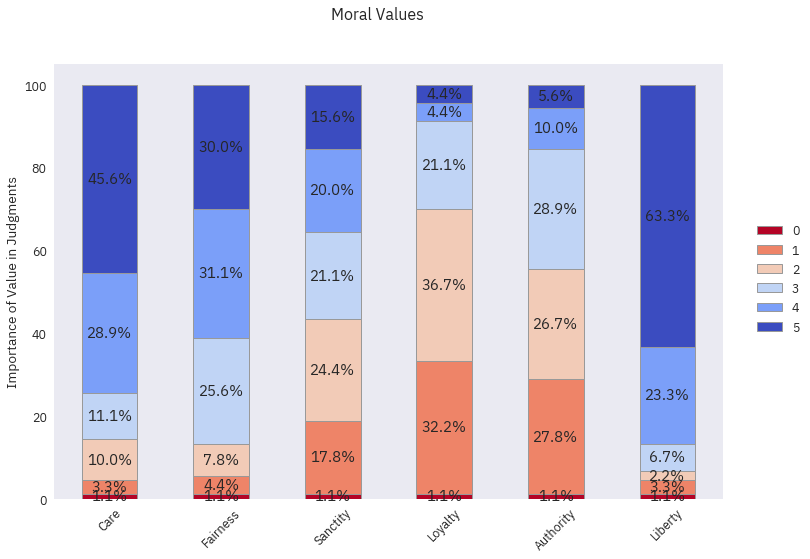

In [215]:
## Round preference (satisfaction)

fig, ax = plt.subplots(1,1, figsize=(12,8))

morals.plot(kind='bar', ax=ax, stacked=True, edgecolor='#999999', grid=False, cmap="coolwarm_r", linewidth=1)

plt.suptitle("Moral Values", fontsize=16)
fig.legend(loc='right')

plt.legend().remove()

plt.xticks(rotation=45)

ax.set_ylabel("Importance of Value in Judgments")

rects = ax.patches

# labels = ["label%d" % i for i in range(len(rects))]

for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2, label,
            ha='center', va='center')
    

fig.savefig('moralvalues.jpg', dpi=300, bbox_inches='tight')

# Enforcement vs. Recommendation

- juror preference
- jury preference

In [216]:
## Across all jurors

df[['complete_enf_rec','complete_enf_enf']].describe()

,complete_enf_rec,complete_enf_enf
count,90.000000,90.000000
mean,3.344444,3.344444
std,1.316798,1.407533
min,0.000000,0.000000
25%,2.250000,3.000000
50%,3.000000,3.500000
75%,4.000000,4.750000
max,5.000000,5.000000


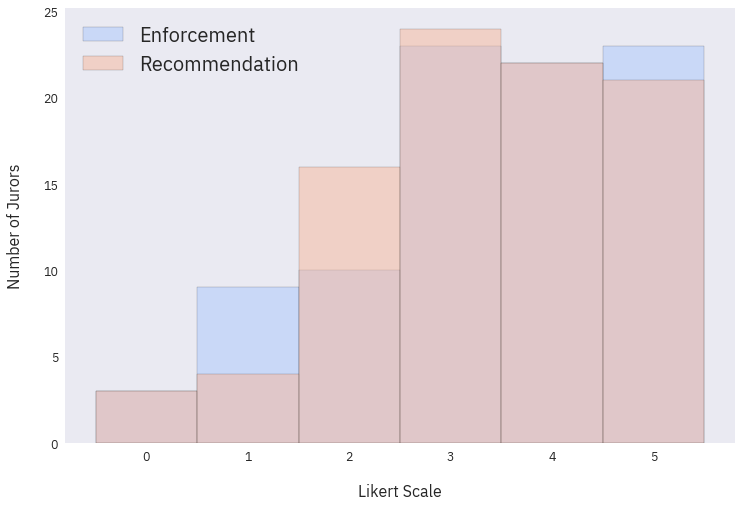

In [11]:
## Overlap hist: Enforcement vs. Recommendation

sns.set_palette("coolwarm", 2)

fig, ax = plt.subplots(nrows=1, figsize=(12,8))

df['complete_enf_enf'].hist(bins=np.arange(0, 6.5) - 0.5, grid=False, alpha=0.5, label='Enforcement', ax=ax, edgecolor='k')
df['complete_enf_rec'].hist(bins=np.arange(0, 6.5) - 0.5, grid=False, alpha=0.5, label='Recommendation', ax=ax, edgecolor='k')

ax.legend(loc='upper left', fontsize=20)

# ax.set_title("Enforcement vs. Recommendation", fontsize=20)

ax.tick_params(axis="both", which="both", 
               bottom=True, top=False, left=True, right=False, 
               labelbottom=True, labelleft=True)

# Draw horizontal axis lines
# vals = ax.get_yticks()
# for tick in vals:
#     ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Likert Scale", labelpad=20, fontsize=16)

# Set y-axis label
ax.set_ylabel("Number of Jurors", labelpad=20, fontsize=16)


fig.savefig('enforce_recommend.jpg', dpi=300, bbox_inches='tight')


# Qualitative Text Analysis

In [ ]:
#### Frequency analysis of themes

# import csv

# with open('themes.csv') as csvfile:
#   readCSV = csv.reader(csvfile, delimiter=',')
#   next(readCSV, None)
#   for row in readCSV:
#     row[1] = row[1] + " "
#     multiplier = int(row[0])
#     print(multiplier * row[1].lower())